In [1]:
#Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
#!pip install datasets

#Install datasets library
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\M\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Mon Sep 22 15:32:29 2025).


In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

In [10]:
df_exploded = df.explode('job_skills')

skill_status = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_status = skill_status.sort_values(by = 'skill_count', ascending=False).head(10)


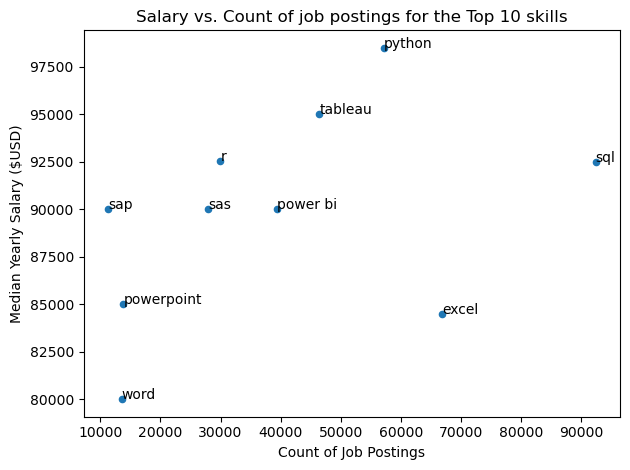

In [15]:
skill_status.plot(kind = 'scatter', x='skill_count', y= 'median_salary')
plt.title('Salary vs. Count of job postings for the Top 10 skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

for i, txt in enumerate(skill_status.index):
    plt.text(skill_status['skill_count'].iloc[i], skill_status['median_salary'].iloc[i], txt)
plt.show()